In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [3]:
# Будем анализировать данные только на обучающей выборке
data = pd.read_csv('/Users/dankarpov/Desktop/annual-motor-vehicle-population-by-vehicle-type.csv', sep=",")

In [4]:
# Первые 5 строк датасета
data.head()

,year,category,type,number
0,2005,Cars and Station-wagons,Private cars,401638
1,2006,Cars and Station-wagons,Private cars,421904
2,2007,Cars and Station-wagons,Private cars,451745
3,2008,Cars and Station-wagons,Private cars,476634
4,2009,Cars and Station-wagons,Private cars,497116


In [5]:
# Размер датасета
data.shape

(307, 4)

In [6]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 307


In [7]:
# Список колонок
data.columns

Index(['year', 'category', 'type', 'number'], dtype='object')

In [8]:
# Список колонок с типами данных
data.dtypes

year         int64
category    object
type        object
number       int64
dtype: object

In [9]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

year - 0
category - 0
type - 0
number - 0


In [10]:
# Основные статистические характеристки набора данных
data.describe()

,year,number
count,307.000000,307.000000
mean,2012.091205,45114.579805
std,4.330107,108430.911345
min,2005.000000,274.000000
25%,2008.000000,2410.000000
50%,2012.000000,9235.000000
75%,2016.000000,27292.500000
max,2019.000000,540063.000000


In [13]:
# Определим уникальные значения для целевого признака
data['number'].unique()

array([401638, 421904, 451745, 476634, 497116, 511125, 520614, 535233,
       540063, 536882,  14936,  15828,  16954,  18246,  18874,  19733,
        20372,  21403,  21756,  21860,    917,    928,    949,    976,
         1011,    940,    919,    899,    897,    874,   7756,   9235,
        11054,  12391,  12763,  13347,  13919,  14862,  15782,    614,
        17238,   1609,  12947,  24413,  33983,  42208,  47224,  50040,
        47899,  45173,  42233,  38146,  22383,  23334,  24446,  24300,
        24702,  26073,  27051,  28210,  27695,  28736, 138588, 141881,
       143482, 145288, 146337, 147282, 145680, 143286, 144307, 144404,
         5697,   5439,   5074,   4941,   4771,   4570,   4402,   4144,
         3166,   2868,  85891,  87805,  91945,  94045,  95185,  93999,
        94710,  93914,  92317,  92731,  26756,  28983,  30207,  31383,
        31884,  31869,  32297,  32313,  32549,  32196,   9849,  10614,
        11378,  12597,  12962,  13175,  13749,  14675,  16170,  16712,
      

<AxesSubplot:xlabel='year', ylabel='number'>

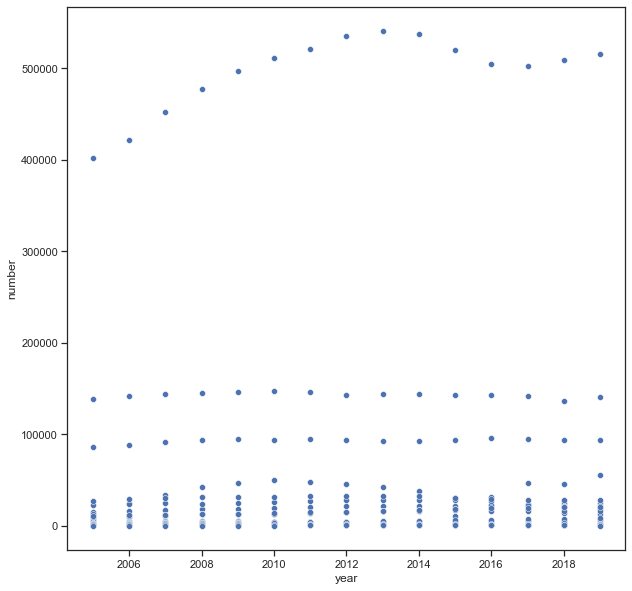

In [14]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='year', y='number', data=data)

/Users/dankarpov/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='year', ylabel='Density'>

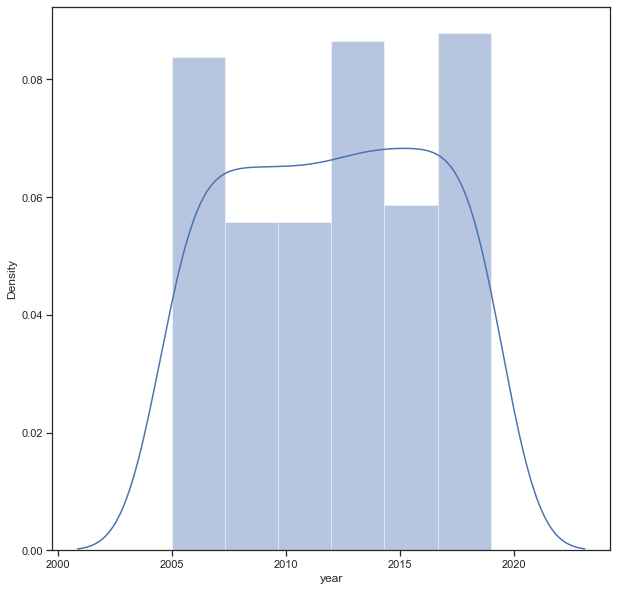

In [16]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['year'])

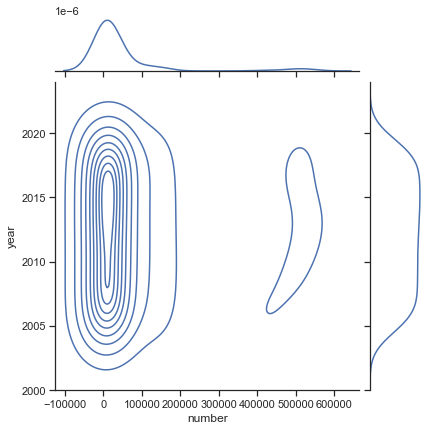

In [17]:
sns.jointplot(x='number', y='year', data=data, kind="kde")

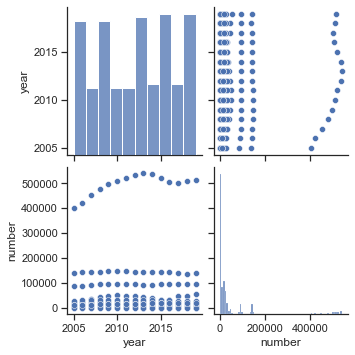

In [18]:
sns.pairplot(data)

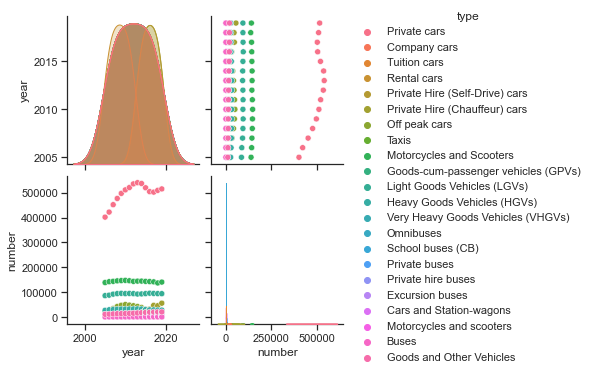

In [19]:
sns.pairplot(data, hue="type")

<AxesSubplot:xlabel='year', ylabel='type'>

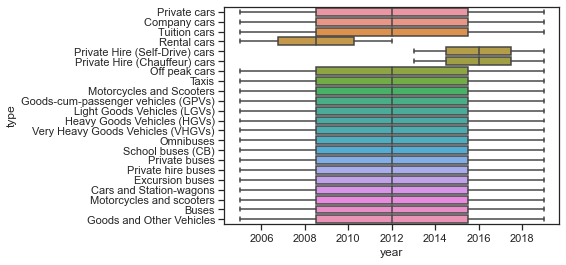

In [20]:
# Распределение параметра Humidity сгруппированные по Occupancy.
sns.boxplot(x='year', y='type', data=data)

<AxesSubplot:xlabel='year'>

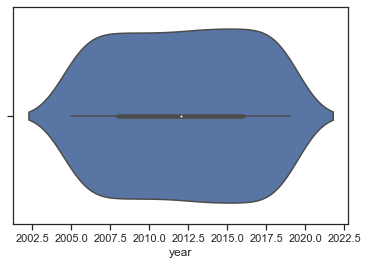

In [21]:
sns.violinplot(x=data['year'])

/Users/dankarpov/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='year', ylabel='Density'>

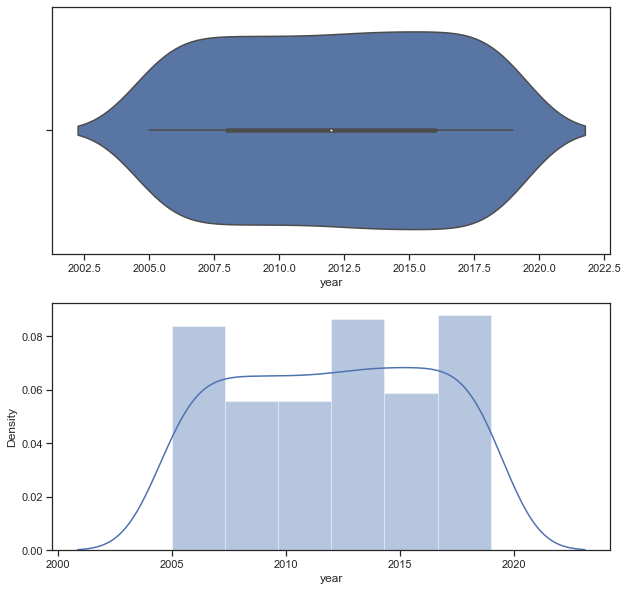

In [22]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['year'])
sns.distplot(data['year'], ax=ax[1])

In [23]:
data.corr()

,year,number
year,1.000000,0.015131
number,0.015131,1.000000


In [24]:
data.corr(method='pearson')

,year,number
year,1.000000,0.015131
number,0.015131,1.000000


In [25]:
data.corr(method='kendall')

,year,number
year,1.000000,0.025723
number,0.025723,1.000000


In [26]:
data.corr(method='spearman')

,year,number
year,1.000000,0.032586
number,0.032586,1.000000


<AxesSubplot:>

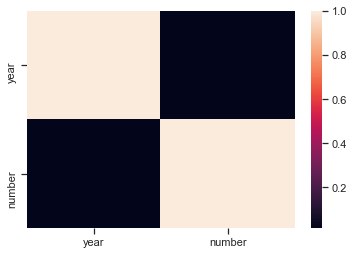

In [27]:
sns.heatmap(data.corr())

<AxesSubplot:>

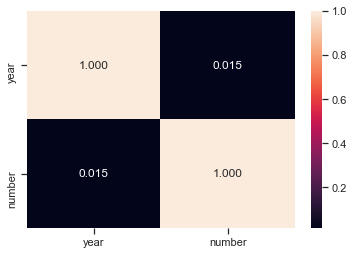

In [28]:
# Вывод значений в ячейках
sns.heatmap(data.corr(), annot=True, fmt='.3f')

<AxesSubplot:>

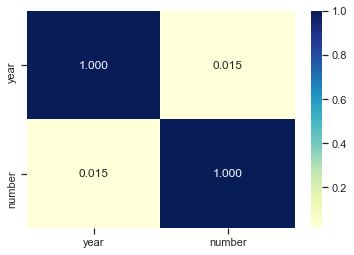

In [29]:
# Изменение цветовой гаммы
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True, fmt='.3f')

<AxesSubplot:>

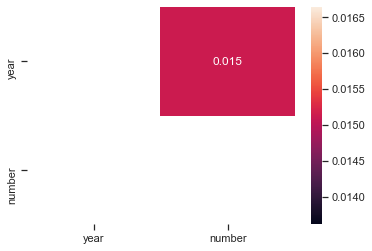

In [30]:
# Треугольный вариант матрицы
mask = np.zeros_like(data.corr(), dtype=np.bool)
# чтобы оставить нижнюю часть матрицы
# mask[np.triu_indices_from(mask)] = True
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.3f')

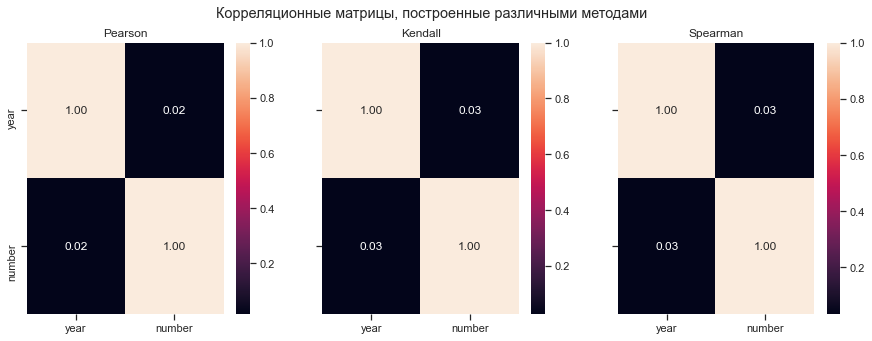

In [31]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')